# Original:  August 2015 
# Revised: October 2016

# Author: FBB

# reproduces the result in Chapter 2 of  http://www.mdrc.org/sites/default/files/What%20Strategies%20Work%20for%20the%20Hard%20FR.pdf 


Populating the interactive namespace from numpy and matplotlib


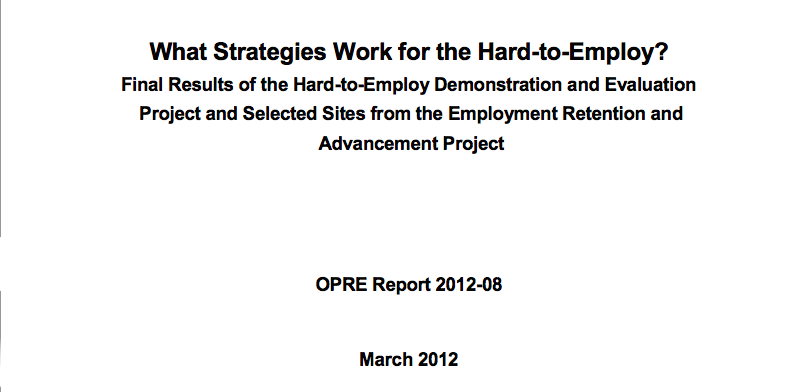

In [4]:
import os
import sys
import numpy as np
import pylab as pl
# a function I wrote to evaluate chi square. It is in evalChisq.py
from evalChisq import evalChisq


import json
import os
s = json.load( open(os.getenv("PUI2016")+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

from IPython.display import Image
Image(filename='../plotsforclasses/NYCReentryprogram_title.png')



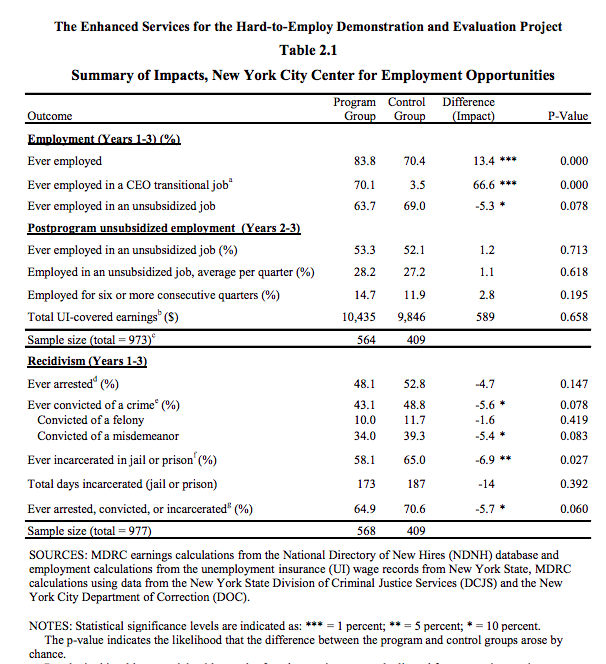

In [5]:
Image(filename='../plotsforclasses/NYCReentryprogram.png')

# NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05

# $H_0: P_0 - P_1 \geq  0$
    
# $H_a: P_0 - P_1 < 0 $   
    
    
 $\alpha$ = 0.05    

 this is a TEST OF PROPORTIONS. we use the Binomial distribution since it is a yes/no (bernulli) test for each subject: the former inmate was or was not ever employed in a CEO transitional job (second row in the table above):

$P_0=0.035, P_1=0.701$

In [7]:

alpha = 0.05
#we like fractions better then percentages. as a rule of thumb, either use fractions or counts
P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

n_0 = 409
n_1 = 564

#lets get the counts by multiplying by the sample size
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1


 2 samples, categorical data

TWO OPTIONS z test, or chi square test.  

# START WITH Z TEST

## the z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the _assumption of normality
must define the sample standard deviation 

standard deviation of the sampling distribution the distribution is Binomial, the binomail stdev is 

(see a proof here!: http://stats.stackexchange.com/questions/29641/standard-error-for-the-mean-of-a-sample-of-binomial-random-variables!): 

$\sqrt{\frac{p(1 - p)}{n}}$

for 2 samples this becomes 

$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n1} + \frac{ \hat{p}(1 - \hat{p})} {n1} }$

cfr: page 138 of Statistics in a Nutshell, eq. 5.12 and here http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP



In [10]:
# i am gonna create a little one line function to calculate the standard dev, 
# note that the lambda function syntax is discouraged under PEP8!

sp_stdev = lambda p, n: np.sqrt( p * ( 1 - p ) / n[0] +  p * ( 1 - p ) / n[1]  )
sp_stdev_2y = sp_stdev((Nt_0 + Nt_1) / (n_0 + n_1), [n_0, n_1])
print ( "test standard deviation error: %.3f"%sp_stdev_2y)

test standard deviation error: 0.032


# z score: how many standard deviation away from the population parameter is my statistic?

# $z=\frac{P_1-P_0}{\sigma}$

In [11]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_2y = zscore(P_1, P_0, sp_stdev_2y)
print ('z score for 1-3 years "ever employed in CEO jobs": z = %.3f'%z_2y)


z score for 1-3 years "ever employed in CEO jobs": z = 20.770


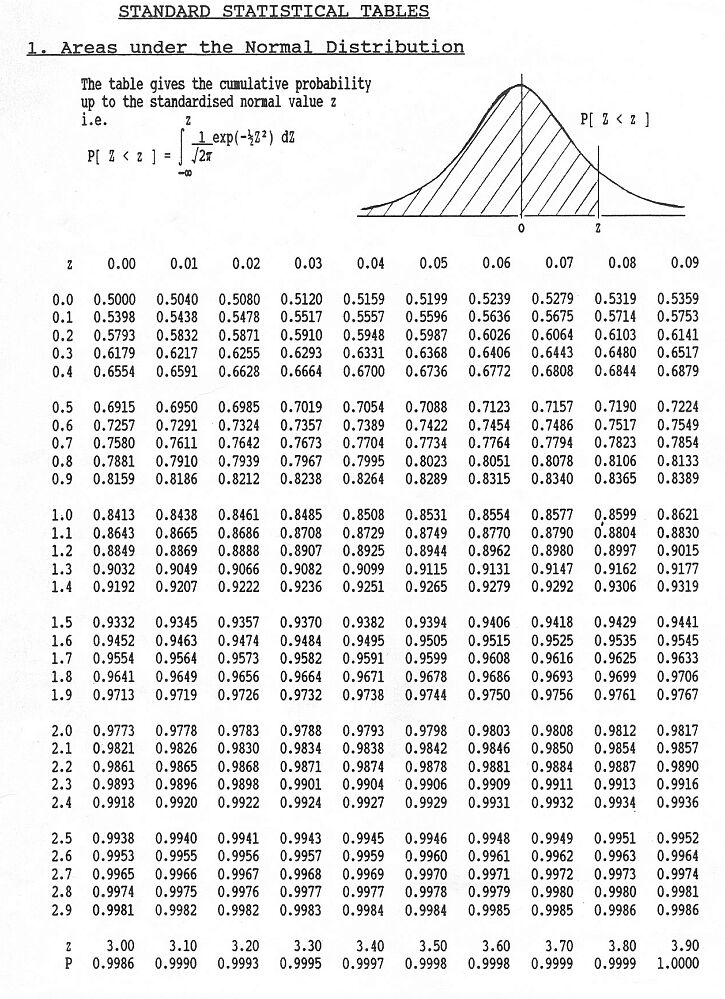

In [12]:
Image('http://intersci.ss.uci.edu/wiki/images/3/3a/Normal01.jpg')

## if $1-P<\alpha$ : reject H0



In [13]:
##p-value for employment after 2 years: since the largest number we read off the table for alpha=0.05 is smaller then the value for our statistic our p-value will be smaller then calculated using .9998
##thus using 0.9998 is a **conservative** approach. 

p_2y = 1 - 0.9998


def report_result(p, a):
    print ('is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a))
    if p<a:
        print ("YES!")
    else: print ("NO!")
    
    print ('the Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') )

    
report_result(p_2y, alpha)

is the p value 0.00 smaller than the critical value 0.05? 
YES!
the Null hypothesis is rejected


##  if we used the values for where the former inmate was " convicted of a crime felony" (3rd row of the table on recidivism) the null hypothesis that the program is not effective at reducing recidivism. a measurable Null is then that the fraction of ex convicts convicted for a felony is greater or equal among felons that were in the program (P1) than it is among felons that were not in the program (P0):

# $H_0:  P_0_recid - P_1_recid < =    0$
    
# $H_a: P_0_recid - P_1_recid > 0$    
    




In [14]:


P_0_recid = 10.0 * 0.01
P_1_recid = 11.7 * 0.01
n_0_recid = 409
n_1_recid = 568


Nt_0_recid = P_0_recid  * n_0_recid 
Nt_1_recid = P_1_recid  * n_1_recid 

sp_stdev_recid = sp_stdev((Nt_0_recid + Nt_1_recid) / \
                          (n_0_recid + n_1_recid), [n_0_recid, n_1_recid])
print ( "test standard deviation error: %.3f"%sp_stdev_recid)


z_recid = zscore(P_1_recid, P_0_recid, sp_stdev_recid)
print ('z score for recidivism "ever convicted of a fellony": z = %.3f'%z_recid)


test standard deviation error: 0.020
z score for recidivism "ever convicted of a fellony": z = 0.838


In [15]:
#get the corresponding p-value by looking up the table above: z = 0.83-> 0.7967
p_recid = 1 - 0.7967
    
report_result(p_recid, alpha)


is the p value 0.20 smaller than the critical value 0.05? 
NO!
the Null hypothesis is not rejected


## The program is not helping recidivism at a statistical significant level

# $\chi^2$ test

 the chisq statistics tests a number against the distribution of the following quantity:

$$\chi^2 = \Sigma \frac{(observation - expectation)^2}{expectation}$$


if we talk about sample fractions  that is 

$$\chi^2 = \Sigma \frac{(f_{observed} - f_{expectated})^2}{f_{expected}}$$

 turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

 the trickiest part (not that tricky) is to figure out the table of values. please see Statistics In a Nutshell Chapter 4, for our data for example:

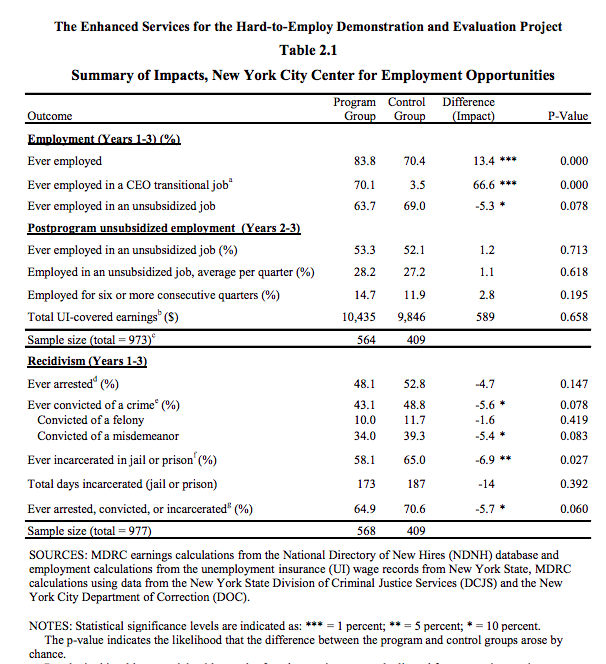

In [16]:
Image(filename='../plotsforclasses/NYCReentryprogram.png')

|employed in CEO job |     employed   | not employed   |                   
|---------------------------|----------------|------------------|---------------------------|
| test sample               | $70.1*5.64$    | $29.9*5.64$      | 564                       |
| control sample            | $3.5*4.09$     | $96.5*4.09$      | 409                       |
|                           |                |                  |                           |
| total                     | 409.679        |   563.321        | 973         |

the expected ratio is the product of the total of all rows and all columns, devided by the total

expected = $\frac{\mathrm{row tot} * \mathrm{col tot}}{\mathrm{total}}$

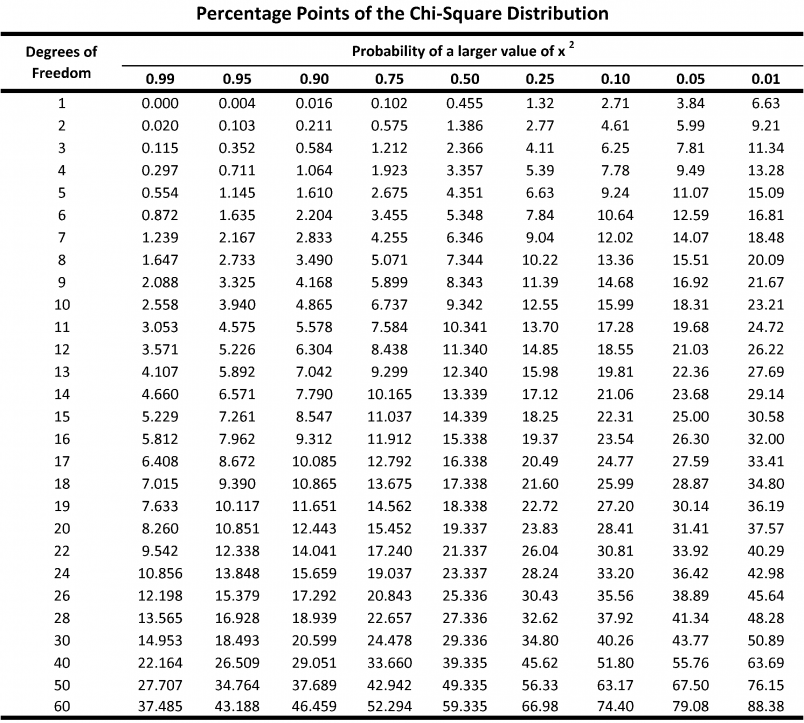

In [17]:
Image("http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG")

In [18]:
sample_values_ceojob  = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])

chisq_ceojob = evalChisq(sample_values_ceojob)
DOF = len(sample_values_ceojob) - 1
print ('chi sq statistics for "ever employed in CEO jobs": '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq_ceojob, DOF))


chi sq statistics for "ever employed in CEO jobs": chisq = 436.223, DOF = 1


In [19]:
chimin_alpha5pc = 3.84
print ("The Null hypothesis that the program does not affect CEO employability, ")
print ("measured as: the inmates not participating in the program are employed in CEO jobs ")
print ("in an equal or higher percentage within 1-3 years of release")
if chisq_ceojob > chimin_alpha5pc :
    print ("can be rejected at alpha = 0.05")
else: 
    print ("cannot be rejected (p<0.05)")
print ("with a chi square statistics of %.2f"%chisq_ceojob )


The Null hypothesis that the program does not affect CEO employability, 
measured as: the inmates not participating in the program are employed in CEO jobs 
in an equal or higher percentage within 1-3 years of release
can be rejected at alpha = 0.05
with a chi square statistics of 436.22


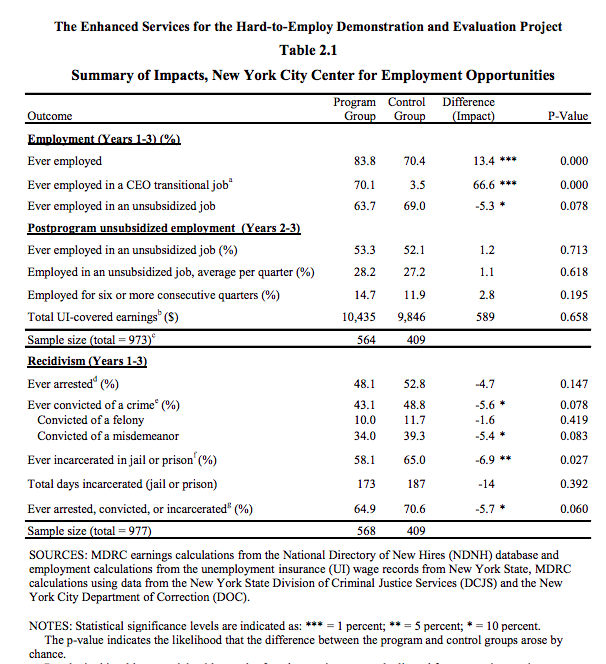

In [20]:
Image(filename='../plotsforclasses/NYCReentryprogram.png')

|convicted of a fellony 1-3y |     recidive   | not recidive     |                   
|----------------------------|----------------|------------------|---------------------------|
| test sample                | $10.0*5.68$    | $90.0*5.68$      | 568                       |
| control sample             | $11. 7*4.09$   | $88.3*4.09$      | 409                       |
|                            |                |                  |                           |
| total                      |  104.653       |  872.347         | 977         |

In [21]:
sample_values_recid = [[0.100 * 568, 0.90 * 568],[0.117 * 409, 0.883 * 409]]
 
chisq_recid = evalChisq(sample_values_recid)
# degrees of freedom: Nvar - 1 
DOF = len(sample_values_recid) - 1
print ('chi sq statistics for "recidivism 1-3 years": '+
       'chisq = {:.3f}, DOF = {:d}'.format(chisq_recid, DOF))


chi sq statistics for "recidivism 1-3 years": chisq = 0.718, DOF = 1


In [23]:
chimin_alpha5pc = 3.84
print ("The Null hypothesis that the program is ineffective at controlling recidivism")
if chisq_recid > chimin_alpha5pc :
    print ("can be rejected at alpha = 0.05")
else: 
    print ("cannot be rejected (p<0.05)")
print ("with a chi square statistics of %.2f"%chisq_recid)
    

The Null hypothesis that the program is ineffective at controlling recidivism
cannot be rejected (p<0.05)
with a chi square statistics of 0.72
